In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
#run_modeを選択 "regular" or "kfold"
run_mode = "kfold"

#datanameを選択
data_name = "CH_data"

#変えた値を選択:"dropout" or "seed"
change_name_dir = "seed"

#optionを選択:dropout -> ["wide" or "detail"], seed -> "seed"
change_name = "seed"

#failを開く
with open(f'result/{change_name_dir}/{data_name}_{change_name}_{run_mode}_log.txt', 'r') as f:
    data = json.load(f)

data

{'42_mae': 0.20686207711696625,
 '42_rmse': 0.27095149592556667,
 '43_mae': 0.19030778110027313,
 '43_rmse': 0.24993592424604258,
 '44_mae': 0.20144203305244446,
 '44_rmse': 0.2642911491033145,
 '45_mae': 0.18820668756961823,
 '45_rmse': 0.24866539890678413,
 '46_mae': 0.1986442655324936,
 '46_rmse': 0.26022529086883645,
 '47_mae': 0.19523990154266357,
 '47_rmse': 0.2618045666189991,
 '48_mae': 0.19971850514411926,
 '48_rmse': 0.2630306500154631,
 '49_mae': 0.20715148746967316,
 '49_rmse': 0.27438061058894647,
 '50_mae': 0.20277941226959229,
 '50_rmse': 0.2694976343394331,
 '51_mae': 0.1903849095106125,
 '51_rmse': 0.24469022305996435}

In [4]:
if change_name == "wide":
    index = [0.0, 0.2, 0.4, 0.6, 0.8]
elif change_name == "detail":
    index = [0.3, 0.34, 0.38, 0.42, 0.46]
elif change_name == "seed":
    index = [42+i for i in range(10)]

if run_mode == "regular":
    columns = ['train_mae', 'train_rmse', 'test_mae', 'test_rmse']
elif run_mode == "kfold":
    columns = ["MAE", "RMSE"]

data = {c: [data[f'{i}_{c.lower()}'] for i in index] for c in columns}
df = pd.DataFrame(data, index=index)

print(df)
#columnsとindexを入れ替える
df = df.T

         MAE      RMSE
42  0.206862  0.270951
43  0.190308  0.249936
44  0.201442  0.264291
45  0.188207  0.248665
46  0.198644  0.260225
47  0.195240  0.261805
48  0.199719  0.263031
49  0.207151  0.274381
50  0.202779  0.269498
51  0.190385  0.244690


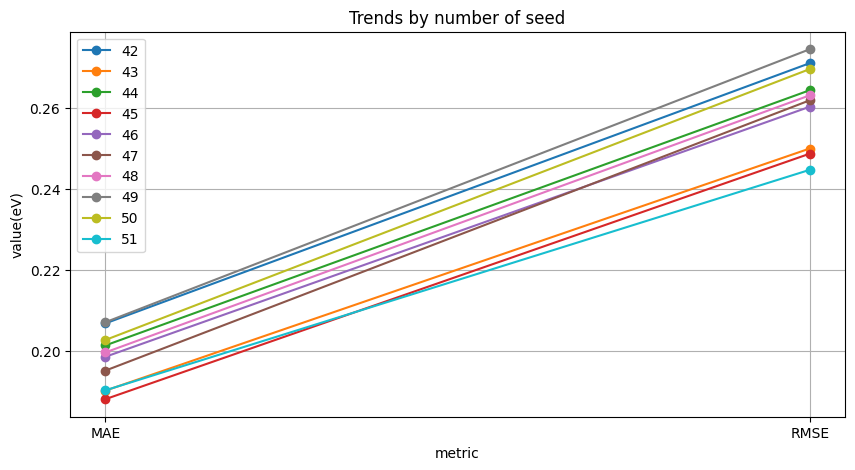

In [5]:
# グラフをプロット
plt.figure(figsize=(10, 5))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)
plt.legend()
plt.xlabel('metric')
plt.ylabel('value(eV)')
plt.title(f'Trends by number of {change_name_dir}')
plt.grid(True)
plt.savefig(f"resultplot/comparison_{change_name_dir}_{change_name}.png")
plt.show()
